<a href="https://colab.research.google.com/github/VMI1997/UCB-Module-5/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().sum()
data["expiration"].value_counts()
print(type("coupon"))
#should make all ages numbers to allow for easier filtering - change 50+ to 50 - change 21- to 20

<class 'str'>


3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon?



In [5]:
(data['Y']==1).sum() / len(data)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

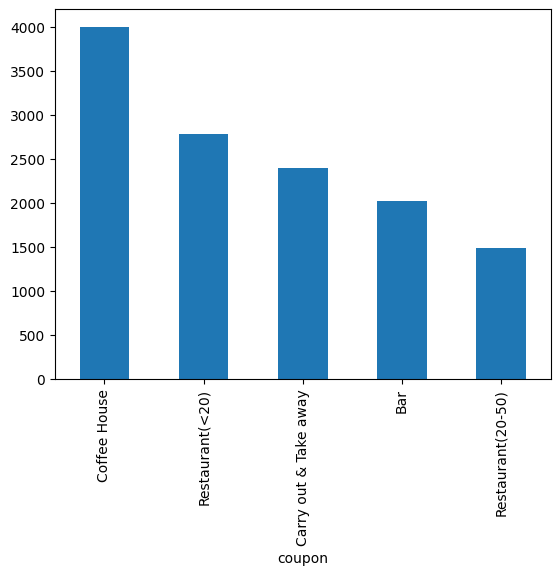

In [6]:
data.coupon.value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

<Axes: >

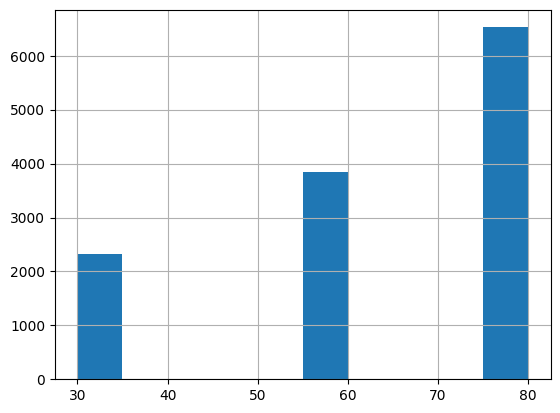

In [7]:
data["temperature"].hist()

In [8]:
#Assess the overall status of missing data across columns
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
data_bar = data[data["coupon"] == 'Bar']
print(data_bar)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [10]:
(data_bar['Y']==1).sum() / len(data_bar)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
bar_3_or_less_accept = len(data_bar[(data_bar['Bar'].isin(['1~3','never','less1'])) & (data_bar['Y']==1)])
bar_3_or_less_both = len(data_bar[(data_bar['Bar'].isin(['1~3','never','less1']))])
bar_4_or_more_accept = len(data_bar[(data_bar['Bar'].isin(['4~8','gt8'])) & (data_bar['Y'] ==1)])
bar_4_or_more_both = len(data_bar[(data_bar['Bar'].isin(['4~8','gt8'])) ])
print('Rate of acceptance for those visiting bar 3 or less times per month is: ' + str(bar_3_or_less_accept / bar_3_or_less_both))
print('Rate of acceptance for those visiting bar 4 or more times per month is: ' + str(bar_4_or_more_accept / bar_4_or_more_both))


Rate of acceptance for those visiting bar 3 or less times per month is: 0.37061769616026713
Rate of acceptance for those visiting bar 4 or more times per month is: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
print(type('age'))
data_bar = data_bar.replace({'50plus':'50', 'below21':'20'})
data_bar['age'] = data_bar['age'].astype(float)
print(data_bar['age'].value_counts())

pct_over_25_w_visits = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['age'] > 25) & (data_bar['Y'] ==1)]) / len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['age'] > 25) ])
pct_under_25 = len(data_bar[(data_bar['age'] < 25) & (data_bar['Y']==1)])
print('The acceptance rate of those who go to a bar more than 1x per month AND are over age 25 is: ' + str(pct_over_25_w_visits))
print('This acceptance is higher than that of all others - which was 41%')

<class 'str'>
age
21.0    417
26.0    395
31.0    339
50.0    283
36.0    209
41.0    178
46.0    109
20.0     87
Name: count, dtype: int64
The acceptance rate of those who go to a bar more than 1x per month AND are over age 25 is: 0.6952380952380952
This acceptance is higher than that of all others - which was 41%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
accept_coupon = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['occupation'] != 'Farming Fishing & Forestry') & (data_bar['Y']==1)])
not_accept_coupon = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['occupation'] != 'Farming Fishing & Forestry') & (data_bar['Y']==0)])
print('The acceptance rate of drivers how go to bars more than once a month and has non-kid passengers and occupations other than Farming, Fishing or Forestry is: ' + str(accept_coupon / (accept_coupon + not_accept_coupon)))

The acceptance rate of drivers how go to bars more than once a month and has non-kid passengers and occupations other than Farming, Fishing or Forestry is: 0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
accept_coupon_1 = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['maritalStatus'] != 'Widowed') & (data_bar['Y']==1)])
not_accept_coupon_1 = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['passanger'] != 'Kid(s)') & (data_bar['maritalStatus'] != 'Widowed') & (data_bar['Y']==0)])
print('The acceptance rate of first population is: ' + str(accept_coupon_1 / (accept_coupon_1+not_accept_coupon_1)))
accept_coupon_2 = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['age'] < 30) & (data_bar['Y']==1)])
not_accept_coupon_2 = len(data_bar[(data_bar['Bar'].isin(['1~3','4~8','gt8'])) & (data_bar['age'] < 30) & (data_bar['Y']==0)])
print('The acceptance rate of second population is: ' + str(accept_coupon_2 / (accept_coupon_2+not_accept_coupon_2)))
accept_coupon_3 = len(data_bar[(data_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & (data_bar['income'].isin(['$37500 - $49999','$25000 - $37499','$12500 - $24999','Less than $12500'])) & (data_bar['Y']==1)])
not_accept_coupon_3 = len(data_bar[(data_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & (data_bar['income'].isin(['$37500 - $49999','$25000 - $37499','$12500 - $24999','Less than $12500'])) & (data_bar['Y']==0)])
print('The acceptance rate of third population is: ' + str(accept_coupon_3 / (accept_coupon_3+not_accept_coupon_3)))

The acceptance rate of first population is: 0.7132486388384754
The acceptance rate of second population is: 0.7217391304347827
The acceptance rate of third population is: 0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'has_children'}>],
       [<Axes: title={'center': 'toCoupon_GEQ5min'}>,
        <Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>],
       [<Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>]], dtype=object)

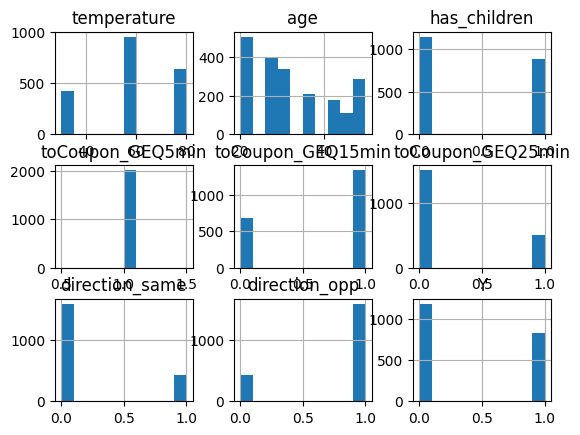

In [ ]:
data_bar.hist()

In [ ]:
(data_bar['Y']==1).sum() / len(data_bar)

0.41001487357461575

array([[<Axes: title={'center': 'age'}>]], dtype=object)

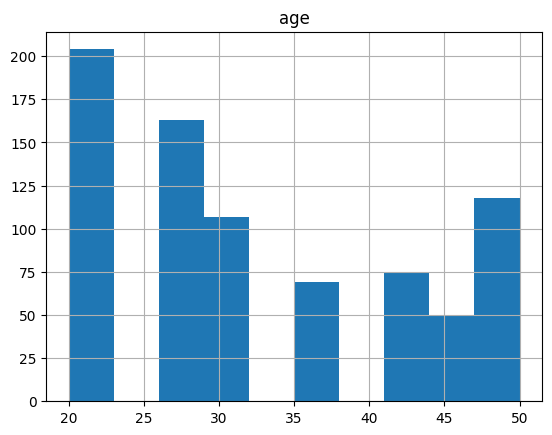

In [ ]:
#Examine age as a driver of acceptance rate of bar coupons
data_bar_accepts = data_bar[data_bar["Y"] == 1]
data_bar.hist('age')

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'has_children'}>],
       [<Axes: title={'center': 'toCoupon_GEQ5min'}>,
        <Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>],
       [<Axes: title={'center': 'direction_same'}>,
        <Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>]], dtype=object)

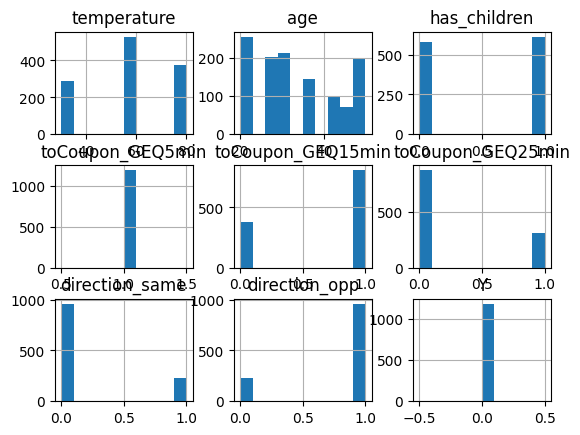

In [32]:
data_bar[data_bar['Y']==0].hist()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
#Look at overall coupon volumes to select target for investigation
data["coupon"].value_counts()

,count
coupon,
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


In [34]:
# create a dataframe for ONLY the Coffee House coupons and compare to rate of ALL coupons
print("The acceptance rate for all coupons is: " + str(len(data[data['Y']==1]) / len(data)))
data_coffee = data[data['coupon']=='Coffee House']
print("The acceptance rate for all Coffee House coupons is: " + str(len(data_coffee[data_coffee['Y']==1]) / len(data_coffee)))

The acceptance rate for all coupons is: 0.5684326710816777
The acceptance rate for all Coffee House coupons is: 0.49924924924924924


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

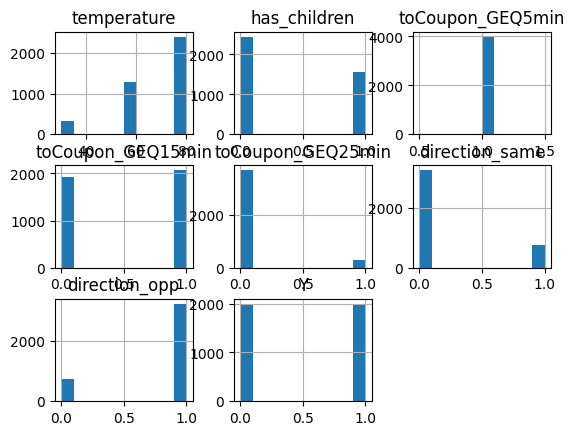

In [35]:
#Examine overall data related to coffee coupons
data_coffee.hist()

In [36]:
data_coffee.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null   obje

In [37]:
#Start with visits to Coffee Houses - assumption is this is a key driver
data_coffee['CoffeeHouse'].value_counts()

,count
CoffeeHouse,
less1,1075
1~3,1042
never,927
4~8,538
gt8,342


In [38]:
#Look at most frequent CH visitors
freq_coffee_accept = len(data_coffee[(data_coffee['CoffeeHouse'].isin(['4~8','gt8'])) & (data_coffee['Y']==1)])
freq_coffee_decline = len(data_coffee[(data_coffee['CoffeeHouse'].isin(['4~8','gt8'])) & (data_coffee['Y']==0)])
print('The acceptance rate of coupons for those visiting >= 4 times/month is: ' + str(freq_coffee_accept / (freq_coffee_accept+freq_coffee_decline)))

The acceptance rate of coupons for those visiting >= 4 times/month is: 0.675


<Axes: xlabel='CoffeeHouse', ylabel='acc_rate'>

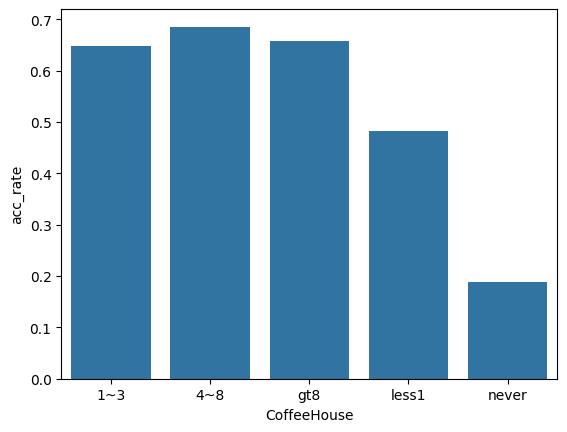

In [39]:
visits_total = data_coffee.groupby(['CoffeeHouse'])['Y'].count()
visits_accept = data_coffee.groupby(['CoffeeHouse'])['Y'].sum()
visits_accept_rate = pd.merge(right=visits_total, left=visits_accept, right_on='CoffeeHouse', left_on='CoffeeHouse')
visits_accept_rate['acc_rate'] = visits_accept_rate['Y_x'] / visits_accept_rate['Y_y']
visits_accept_rate
sns.barplot(visits_accept_rate, x='CoffeeHouse', y='acc_rate')

<Axes: >

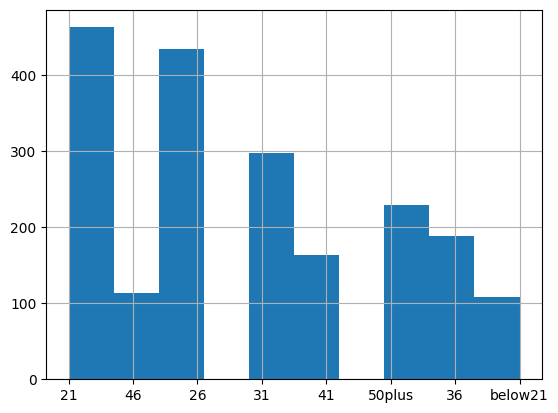

In [40]:
#Investigage Age as a driver of coupon acceptance
accepts = data_coffee[data_coffee['Y']==1]
accepts['age'].hist()

<Axes: >

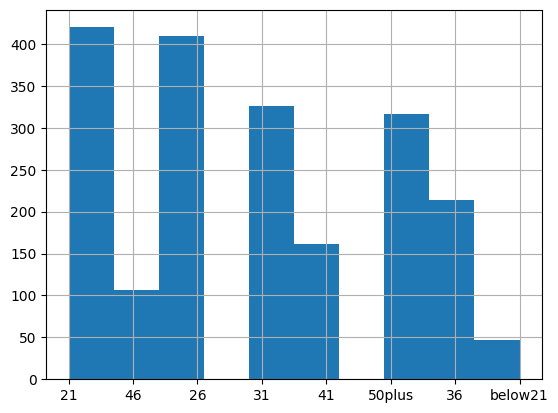

In [41]:
accepts = data_coffee[data_coffee['Y']==0]
accepts['age'].hist()

In [42]:
age_accepts = data_coffee.groupby(['age'])['Y'].sum()

In [43]:
age_all_coupons = data_coffee.groupby(['age'])['Y'].count()

         Y_x  Y_y
age              
21       883  463
26       843  434
31       623  297
36       402  188
41       325  163
46       220  113
50plus   545  229
below21  155  108


<Axes: xlabel='age', ylabel='acc_rate'>

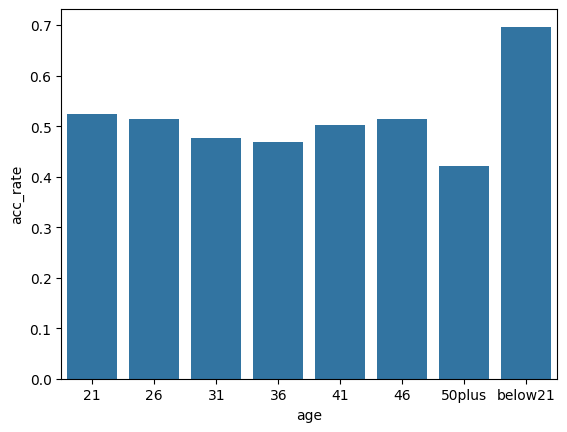

In [44]:
age_accept_rate = pd.merge(right=age_accepts, left = age_all_coupons, right_on='age', left_on='age')
print(age_accept_rate)
age_accept_rate['acc_rate']= age_accept_rate['Y_y'] / age_accept_rate['Y_x']
age_accept_rate
sns.barplot(age_accept_rate, x='age', y='acc_rate')

In [45]:
#examine education as a correlation to acceptance - start by assessing data
data_coffee['education'].value_counts()

,count
education,
Some college - no degree,1371
Bachelors degree,1370
Graduate degree (Masters or Doctorate),598
Associates degree,350
High School Graduate,279
Some High School,28


In [46]:
#Look at income as driver of acceptance rates
inc_accepts = data_coffee.groupby(['income'])['Y'].sum()

inc_totals = data_coffee.groupby(['income'])['Y'].count()

inc_accept_rate = pd.merge(right=inc_accepts, left=inc_totals, right_on='income', left_on='income')
inc_accept_rate['acc_rate'] = inc_accept_rate['Y_y'] / inc_accept_rate['Y_x']
inc_accept_rate['acc_rate'].min()
inc_accept_rate['acc_rate'].max()
inc_accept_rate


,Y_x,Y_y,acc_rate
income,,,
$100000 or More,534,264,0.494382
$12500 - $24999,594,321,0.540404
$25000 - $37499,640,303,0.473438
$37500 - $49999,590,320,0.542373
$50000 - $62499,548,276,0.503650
$62500 - $74999,275,120,0.436364
$75000 - $87499,236,70,0.296610
$87500 - $99999,271,151,0.557196
Less than $12500,308,170,0.551948


In [47]:
dir_accepts = data_coffee.groupby(['direction_same'])['Y'].sum()

In [49]:
#Examine if practicality (i.e. proximity to CH) is a driver of acceptance
dir_totals = data_coffee.groupby(['direction_same'])['Y'].count()
dir_totals
dir_accept_rate = pd.merge(right=dir_accepts, left=dir_totals, right_on='direction_same', left_on='direction_same')

dir_accept_rate['acc_rate'] = dir_accept_rate['Y_y'] / dir_accept_rate['Y_x']
dir_accept_rate

,Y_x,Y_y,acc_rate
direction_same,,,
0,3246,1597,0.491990
1,750,398,0.530667
